# Polynomial Regression
You should know what Linear Regression is by this point, a machine learning algorithm that learns to fit a straight line to the training data it has been given. This is great for data that is easily seen to have a straight line trend. Such as this:

![Linear Data](https://media.geeksforgeeks.org/wp-content/uploads/random_linear_data.png)

As expected however, there are many datasets that don't have a linear trend that effectively solves it such as this:

![Quadratic Data](https://www.statisticshowto.datasciencecentral.com/wp-content/uploads/2016/05/Andragradsfunktion_med_brus_1.png)

Upon looking at the data plotted however, we can deduce an order of degree (highest power in the equation) of a function that nicely plots a trendcurve for the data. For example, when taking look at the plot above, we can see that a quadratic formula would work nicely. This is what is defined as Polynomial Regression, using a function that is of higher order of degree than 1 inplace of the linear equation in Linear Regression such as the quadratic equation or cubic equation. Apart from this distinction, all else remains the same.

As expected however, we will have more variables to train. In linear regression, we had 2 variables, the weight (slope) and the bias (y-intercept). However, for a quadractic regression (regression performed with a quadratic equation), we have 3 variables we need to train as we need to train the coefficient of the quadratic term (a / weight1), the coefficient for the linear term (b / weight2) and the constant (c / bias) as seen:

![Quadratic Equation1](https://latex.codecogs.com/gif.latex?y%3Dax%5E2&plus;bx&plus;c)

With the higher order of degree your equation is, the more variables you have to train. With our knowledge of gradient descent, this shouldn't be too hard to do but Polynomial Regression allows us to model many more forms of data.

Apart from that, everything else about training a Polynomial Regression Model is exactly the same as training a Linear Regression Model so a lot of the code will look extremely familiar and you would understand most concepts before hand from learning Linear Regression.

We will be using Tensorflow for this tutorial.

## Imports
We import Tensorflow for all the necessary training functions and math operations, Pandas for loading the data from a CSV file and Matplotlib for all our graphing needs.

In [26]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Model Architecture and Training
As mentioned, we will be training a quadratic equation to fit the Position Salaries Dataset as it seems to be the simplest and most accurate as seen by plotting it. So, we have 3 trainable variables: a, b, c which we name weight1, weight2 and bias respectively to follow Machine Learning terminology.

![Quadratic Equation1](https://latex.codecogs.com/gif.latex?y%3Dax%5E2&plus;bx&plus;c)
![Quadratic Equation2](https://latex.codecogs.com/gif.latex?y_%7Bpred%7D%3Dw_%7B1%7Dx%5E2&plus;w_%7B2%7Dx&plus;b)

For the training portion, it really is quite the same as linear regression. We use the loss function MSE to calculate the loss.

![Loss Function](https://latex.codecogs.com/gif.latex?loss%3D%5Cfrac%7B1%7D%7Bn%7D%5Csum%20_%7Bi%3D1%7D%5E%7Bn%7D%28y_%7Bpred%7D-y_%7Bexpec%7D%29%5E2)
![Loss Function Expanded](https://latex.codecogs.com/gif.latex?loss%3D%5Cfrac%7B1%7D%7Bn%7D%5Csum%20_%7Bi%3D1%7D%5E%7Bn%7D%28w_%7B1%7Dx%5E2&plus;w_%7B2%7Dx&plus;b-y_%7Bexpec%7D%29%5E2)

Then we find the partial derivative of the loss function with respect to each variable (weight1, weight2 and bias) and use them to find the optimal values to find the local minimum of the loss function, exactly the same as linear regression! In this case, those partial derivatives would be these:

let x = input, w_1 = weight1, w_2 = weight2, b = bias, y_pred = model's prediction, y_expec = expected output, n = number of inputs and corresponding outputs

![dloss w.r.t dweight1](https://latex.codecogs.com/gif.latex?%5Cfrac%7B%5Cpartial%20loss%7D%7B%5Cpartial%20w_%7B1%7D%7D%3D%5Cfrac%7B2x%5E2%7D%7Bn%7D%5Csum%20_%7Bi%3D1%7D%5E%7Bn%7D%28w_%7B1%7Dx%5E2&plus;w_%7B2%7Dx&plus;b-y_%7Bexpec%7D%29%3D%5Cfrac%7B2x%5E2%7D%7Bn%7D%5Csum%20_%7Bi%3D1%7D%5E%7Bn%7D%28y_%7Bpred%7D-y_%7Bexpec%7D%29)
![dloss w.r.t dweight2](https://latex.codecogs.com/gif.latex?%5Cfrac%7B%5Cpartial%20loss%7D%7B%5Cpartial%20w_%7B2%7D%7D%3D%5Cfrac%7B2x%7D%7Bn%7D%5Csum%20_%7Bi%3D1%7D%5E%7Bn%7D%28w_%7B1%7Dx%5E2&plus;w_%7B2%7Dx&plus;b-y_%7Bexpec%7D%29%3D%5Cfrac%7B2x%7D%7Bn%7D%5Csum%20_%7Bi%3D1%7D%5E%7Bn%7D%28y_%7Bpred%7D-y_%7Bexpec%7D%29)
![dloss w.r.t dbias](https://latex.codecogs.com/gif.latex?%5Cfrac%7B%5Cpartial%20loss%7D%7B%5Cpartial%20b%7D%3D%5Cfrac%7B2%7D%7Bn%7D%5Csum%20_%7Bi%3D1%7D%5E%7Bn%7D%28w_%7B1%7Dx%5E2&plus;w_%7B2%7Dx&plus;b-y_%7Bexpec%7D%29%3D%5Cfrac%7B2%7D%7Bn%7D%5Csum%20_%7Bi%3D1%7D%5E%7Bn%7D%28y_%7Bpred%7D-y_%7Bexpec%7D%29)

Thankfully though, we need not code any of this because Tensorflow's Graident Tape and premade optimizers can track down all the variables used in the loss function and find the partial derivatives on its own which is what is done here and then apply them to the weights and bias for an improved model using the Gradient Tape's gradient function. Then we simply apply those computed gradients to the weights and bias and the epoch is complete. We will be using the Stochastic Gradient Descent (SGD) optimizer in this tutorial to keep things as bare boned as possible. To make the trainer and the model easily reusable, we store in the classes so we can instantiate from them an indefinite amount of times.

In [27]:
class PolynomialRegressionDegree2():
    def __init__(self):
        #defining weights and biases
        self.weight1 = tf.Variable(tf.random.normal(shape=(1, 1)), dtype="float32", name="weight1", trainable=True)
        self.weight2 = tf.Variable(tf.random.normal(shape=(1, 1)), dtype="float32", name="weight2", trainable=True)
        self.bias = tf.Variable(tf.random.normal(shape=(1, 1)), dtype="float32", name="bias", trainable=True)
        
    def __call__(self, x):
        y = tf.multiply(tf.square(x), self.weight1) + tf.multiply(x, self.weight2) + self.bias
        
        return y
        
class PolynomialTrainer:
    def __init__(self, learning_rate=1e-2):
        self.learning_rate = learning_rate
        self.optimizer = tf.optimizers.SGD(self.learning_rate)
        self.loss = tf.losses.MSE
        
    def train(self, polynomial_model, x, y_expec, epochs=1000):
        for e in range(epochs):
            with tf.GradientTape() as t:
                y_pred = polynomial_model(x)
                loss = tf.reduce_mean(tf.square(y_expec - y_pred))
                grads = t.gradient(loss, [polynomial_model.weight1, polynomial_model.weight2, polynomial_model.bias])
                self.optimizer.apply_gradients(zip(grads, [polynomial_model.weight1, polynomial_model.weight2, polynomial_model.bias]))

## Dataset Processing and Random Data Generation

Knowing our Dataset lies in the file called, "Position_Salaries.csv", we can use Pandas' handy read_csv function to load that data into memory as a dataframe object. We then drop the "Position" column as it is redundant data due to the fact the "Level" column already expresses it and is numerical so we do not have to do carry out more preprocessing. Then, we split our data into outputs and inputs by making "Level" our inputs and "Salary" as the outputs.

Apart from that, it would be nice to see how our model performs on a randomly generated dataset to evaluate how easily it could fit itself to different data. That is why we implement the generateRandomData function. It uses numpy to generate random points along a quadratic curve and each point has a random deviation from the actual curve.

In [28]:
def processDataset():
    with open("Position_Salaries.csv") as file:
        dataframe = pd.read_csv(file)
    
    dataframe.drop("Position", axis=1, inplace=True)
    
    x = tf.constant(dataframe.drop("Salary", axis=1).values.tolist(), dtype="float32")
    y = tf.constant(dataframe["Salary"].values.tolist(), shape=[len(dataframe["Salary"].values.tolist()), 1], dtype="float32")
    
    return x, y

def generateRandomData(minVal, maxVal, numVals, a, b, c):
    x = tf.constant(np.linspace(minVal, maxVal, numVals), shape=(numVals, 1), dtype="float32")
    y = tf.multiply(a, tf.square(x)) + tf.multiply(b, x) + c + (10 * np.random.randn(numVals, 1))
    
    return x, y

## Train on Random Data
We initialize a random dataset by giving the generateRandomData a range to generate values within, the number of inputs we want, a, b, c (weight1, weight2, bias) which we use so we can evaluate how close the model gets. It then does so and returns a set of inputs and corresponding outputs.

In [29]:
a, b, c = 1.5, 2, 3
x, y = generateRandomData(0, 10, 20, a, b, c)

The we instantiate a Quadratic Regression Model and it's trainer from the premade classes above. We will use a learning rate of 0.0001 as this value is what allows the model to train without reducing the weights and bias into NaN (Not a Number) values and makes big enough steps that show improvement.

In [30]:
model = PolynomialRegressionDegree2()
trainer = PolynomialTrainer(learning_rate=0.0001)

We then train the model on the given dataset for 1000 epochs.

In [31]:
trainer.train(model, x, y, epochs=1000)

To prove that the model has fitted itself to the data, we plot the data and the quadratic curve the model has ended with on a Cartesian Plane in order to see how well the model's solution fits the data.

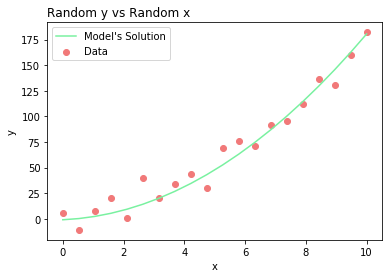

In [32]:
yPred = model(x)
plt.title("Random y vs Random x", loc="left")
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(x, y, c="#F17979", label="Data")
plt.plot(x, yPred, c="#79F1A0", label="Model's Solution")
plt.legend(loc="upper left")
plt.show()

As you can see, the model has found a solution which fits the data almost perfectly but not overfitting itself. I'll explain overfitting in just a bit.

## Train on the Given Dataset
Now that we've tested our model on a randomly generated dataset, might as well test it on some real world data. So we reinitialize our model to reset it with random weights and bias so we can assess it more regularly. The trainer is made in a way that doesn't need reinitialization so we can just reuse the previous one.

In [33]:
model = PolynomialRegressionDegree2()

Next we load in our dataset using the premade processDataset function to split the CSV file with the data into inputs (x) and outputs (y).

In [34]:
x, y = processDataset()

Then we simply train it like before, again for a 1000 epochs

In [35]:
trainer.train(model, x, y, epochs=1000)

In order to see how well the model fitted itself, we can scatter plot the training data and then plot the quadratic regression line.

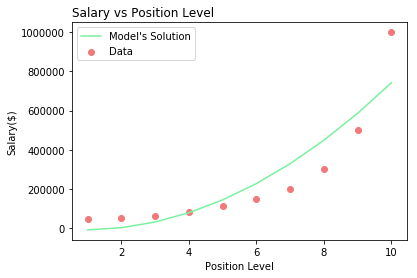

In [36]:
yPred = model(x)
plt.title("Salary vs Position Level", loc="left")
plt.xlabel("Position Level")
plt.ylabel("Salary($)")
plt.scatter(x, y, c="#F17979", label="Data")
plt.plot(x, yPred, c="#79F1A0", label="Model's Solution")
plt.legend(loc="upper left")
plt.show()

As seen here, the model's quadratic architecture probably isn't the best for this dataset. It tried it's best but simply isn't "wired" for the job. An exponential function would suit it better in my opinion, don't you? But that steps into exponential regression, no longer in the realm of polynomial regression or tutorial, but the difference between the 2 is the same as the difference between polynomial and linear regression. A nice challenege for you would be to try exponential regression on the same dataset, with an exponential equation instead of the qudratic one.

## Overfitting
I promised a brief explanation of overfitting. Overfitting is when the model becomes so accustomed to the train data, it perfectly alligns itself to the data points, so much so, that it does just not know how to handle any unseen data logically and reliably. Akin to a student who is about to take a test, but only studies in the form of memorizing answers for the questions in the review packet instead of actually learning the method to solve all questions of the type. The rise of intelligence comes from a model that is able to generalize so a model that only "memorized" it's train data and can't reliably predict for test data is not much more reliable compared to code that has been hardcoded with answers. Overfitting should always be avoided due to this.